In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Zadnie 1
### Przekształcenie sfery w elipsę

###### 1.1 Narysuj sferę jednostkową w 3D

In [2]:
def draw_parametric(V, n=500, S=[0, 2*np.pi], T=[0, np.pi]):
    s,t = np.meshgrid(np.linspace(S[0], S[1], n), np.linspace(T[0], T[1], n))
    fig = plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.plot_surface(V[0](s,t), V[1](s,t), V[2](s,t))
    plt.show()
    return V[0](s,t).flatten(), V[1](s,t).flatten(), V[2](s,t).flatten() 

Funkcja draw_parametric - rysuje figurę zadaną parametrycznie i odpowiednią dokładnością oraz zwraca wpółrzędne punktów z jej powierzchni

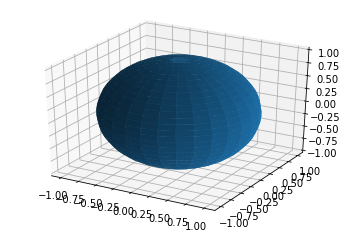

In [3]:
V = [lambda s, t: np.cos(s)*np.sin(t),
     lambda s, t: np.sin(s)*np.sin(t),
     lambda s, t: np.cos(t)]

X, Y, Z = draw_parametric(V, n=30)

S = np.array([X,Y,Z])

###### 1.2 Wygeneruj 3 różne macierze $ A_1, A_2, A_3, (A_i \in \mathbb{R}^{3x3}) $ i przekształć sferę w elipsoidę

In [4]:
def draw_elipsoid(x, y, z):
    plt.clf()
    fig = plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.plot3D(x, y, z)
    plt.show()

Funkcja draw_elipsoid - przyjmuje punkty z powierzchni i na ich podstawie rysuje figurę(w naszym przypadku elipsoidę)

<Figure size 432x288 with 0 Axes>

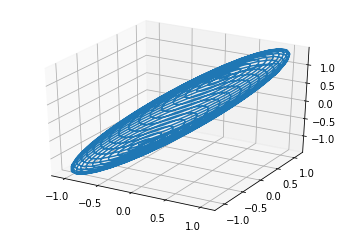

<Figure size 432x288 with 0 Axes>

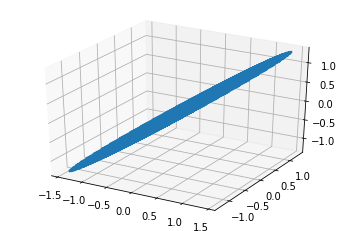

<Figure size 432x288 with 0 Axes>

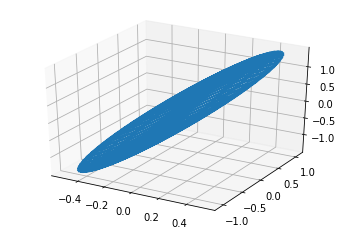

In [5]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

eli1 = A1 @ S
eli2 = A2 @ S
eli3 = A3 @ S

draw_elipsoid(*eli1)
draw_elipsoid(*eli2)
draw_elipsoid(*eli3)

Dostajemy elipsoidy otrzymane, po przekształceniu sfery przy pomocy losowych macierzy z $ \mathbb{R}^{3x3} $

###### 1.3 Dokonaj rozkładu SVD każdej macierzy $ A_i $ i zaznacz na wykresie

In [6]:
def scatterax(eli, u, s, vh):
    xs=[]
    ys=[]
    zs=[]
    for sig in np.diag(s):
        tmp = u@sig
        xs.append(tmp[0])
        ys.append(tmp[1])
        zs.append(tmp[2])
    plt.clf()
    fig = plt.figure()
    ax=fig.gca(projection='3d')
    ax.scatter(*eli, color='grey')
    ax.quiver([0]*3, [0]*3, [0]*3, xs, ys, zs, color='r')
    plt.show()

Funkcja scatterax - przyjmuje dane elipsy i jej svd, oraz zaznacza na wykresie

In [7]:
u1, s1, vh1 = np.linalg.svd(A1)
u2, s2, vh2 = np.linalg.svd(A2)
u3, s3, vh3 = np.linalg.svd(A3)

Wywołujemy funkcję np.linalg.svd dokonującą rozkład według wartości osobliwych, dla poprzednio wylosowanych losowych macierzy służących do zniekształcenia sfery i zapamiętujemy jej wyniki.

<Figure size 432x288 with 0 Axes>

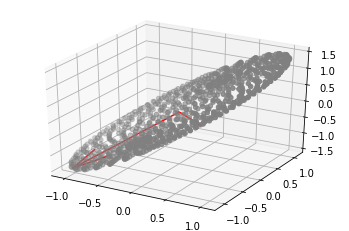

<Figure size 432x288 with 0 Axes>

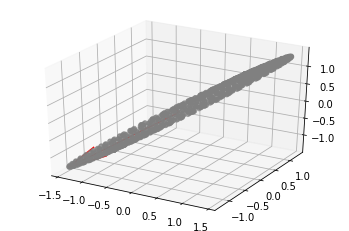

<Figure size 432x288 with 0 Axes>

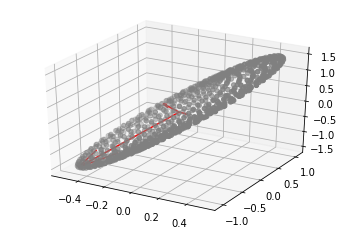

In [8]:
scatterax(eli1, u1, s1, vh1)
scatterax(eli2, u2, s2, vh2)
scatterax(eli3, u3, s3, vh3)

###### 1.4 Znajdź taką macierz $ A_i $, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100 i narysuj jej elipsoidę. 

[[0.78013256 0.50463896 0.84861379]
 [0.39327734 0.99204428 0.55953717]
 [0.90453091 0.21243011 0.91292061]]
[-0.54862719  1.8677157   0.97092041]


<Figure size 432x288 with 0 Axes>

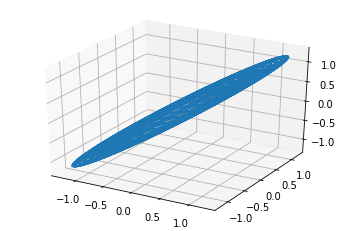

In [9]:
Ai = np.random.rand(3,3)
Ui,Si,Vi = np.linalg.svd(Ai)
while max(Si)/min(Si) < 100:
    Ai = np.random.rand(3,3)
    Ui,Si,Vi = np.linalg.svd(Ai)

print(Ai)
print(Ui@Si@Vi)

eli = Ai @ S
draw_elipsoid(*eli)

Otrzymana elipsoida jest bardzo "rozciągnięta".

###### 1.5 Dla wybranej macierzy $ A_i $ przedstaw wizualizacje $ SV_i^T $, $ S\Sigma_iV_i^T $ oraz $ SU_i\Sigma_iV_i^T $, gdzie $ A_i=U_i\Sigma_iV_i^T $

$ S $

<Figure size 432x288 with 0 Axes>

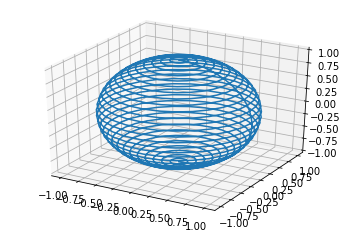

In [10]:
draw_elipsoid(*S)

Pierwotna sfera, dla porównania

$ SV_i^T $

<Figure size 432x288 with 0 Axes>

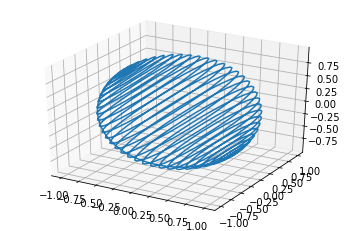

In [11]:
draw_elipsoid(*(Vi.T@S))

$ V_i $ wpływa nam na pochylenie/obrócenie elipsoidy

$ S\Sigma_iV_i^T $

<Figure size 432x288 with 0 Axes>

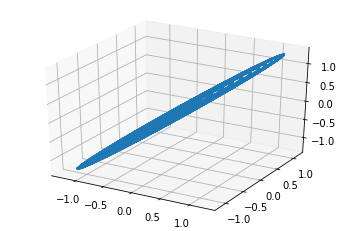

In [12]:
draw_elipsoid(*(Vi.T@np.diag(Si)@S))#(*(Vi.T@np.diag(Si)@S))

$ \Sigma_i $ wpływa nam na rozciągnięcie(i spłaszczenie tym samym) elipsoidy

$ SU_i\Sigma_iV_i^T $

<Figure size 432x288 with 0 Axes>

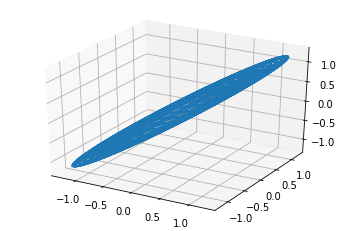

In [13]:
draw_elipsoid(*(Ui@np.diag(Si)@Vi@S))

$ U_i $ wpływana nam na pochylenie/obrócenie elipsoidy

# Zadanie 2
### Kompresja obrazu

###### 2.1 Przygotuj przykładowe zdjęcie o rozmiarze 512x512 pikseli

In [14]:
def drawimg(pic):
    fig, ax = plt.subplots()
    im = ax.imshow(pic)

    ax.axis('off')
    plt.show()

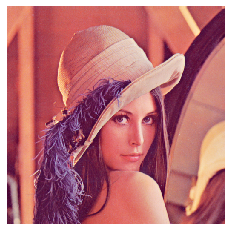

In [15]:
Lenna = plt.imread("Lenna.png")
drawimg(Lenna)

Wczytujemy i rysujemy zdjęcie

###### 2.2 Oblicz SVD macierzy pikseli I, a następnie dokonaj przybliżenia tej macierzy za pomocą low rank approximation(k pierwszych wartości osobliwych) uzyskując kompresję Lenny

$$ I\simeq \displaystyle\sum_{i=1}^{k} \sigma_iu_iv_i^T $$
Gdzie $ \sigma_i $ jest i-tą wartością osobliową macierzy $ I $, $ u_i $ jest lewym wektorem osobliwym, a $ v_i $ - prawym wektorem osobliwym

In [16]:
def compress(U, S, V, K):
    return U[:,:K] @ np.diag(S[:K]) @ V[:K,:]

Funkcja compress - przyjmuje wyniki zwrócone z SVD i k, na których podstawie wylicza i zwraca odpowiednio skompresowane zdjęcia

###### 2.3 Porównaj obraz wynikowy z obrazem źródłowym dla różnych k

In [17]:
def drawcmpimg(picA, picB):
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
    ax1.imshow(picA)
    ax2.imshow(picB)
    ax3.imshow(np.absolute(np.subtract((picB*255).astype(np.uint8),picA)).astype(np.uint8))
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    plt.show()

Funkcja drawcmpimg - przyjmuje dwa zdjęcia(w postaci macierzy pikseli) oraz różnicę między nimi oraz wyrysowuje pierwsze (skompresowane w odpowiednim stopniu), drugie (oryginał), różnicę między oboma zdjęciami(im czarniejszy i jednostajny obraz tym bardziej podobne obrazki)

In [18]:
SVD0 = np.linalg.svd(Lenna[:,:,0], full_matrices=False)
SVD1 = np.linalg.svd(Lenna[:,:,1], full_matrices=False)
SVD2 = np.linalg.svd(Lenna[:,:,2], full_matrices=False)

Usunąłem wyjście z cellki poniżej, ponieważ wychodzi dużo zdjęć, które zajmują dużo pamięci(różnica prawie 9MB).

32


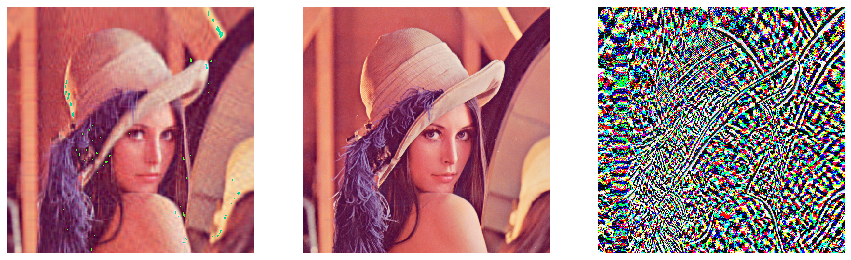

64


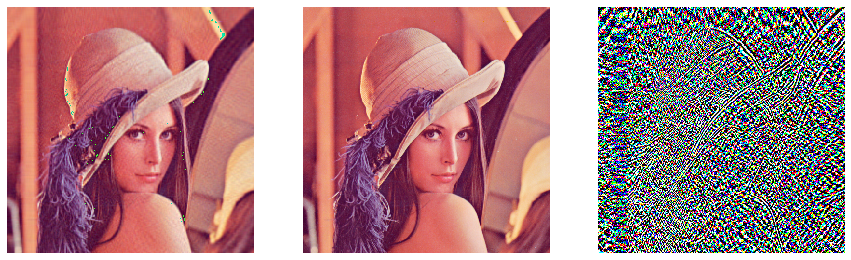

96


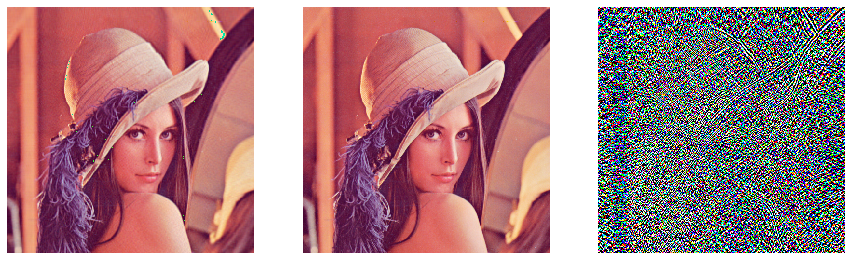

128


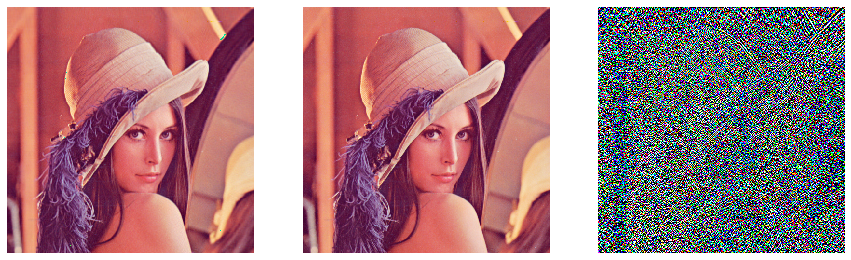

160


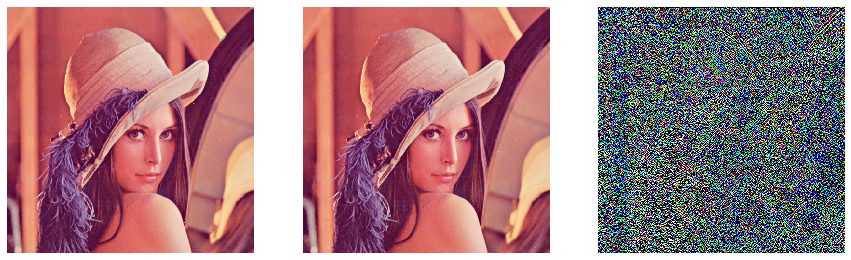

192


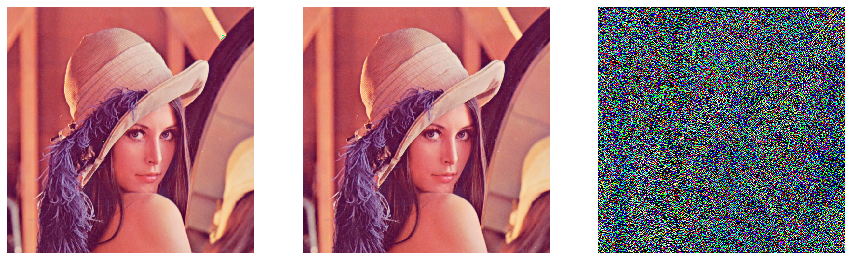

224


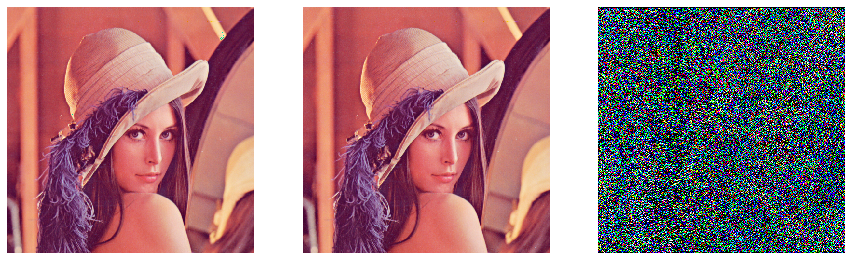

256


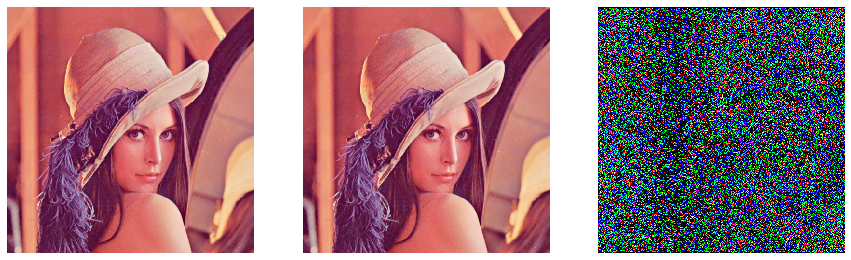

288


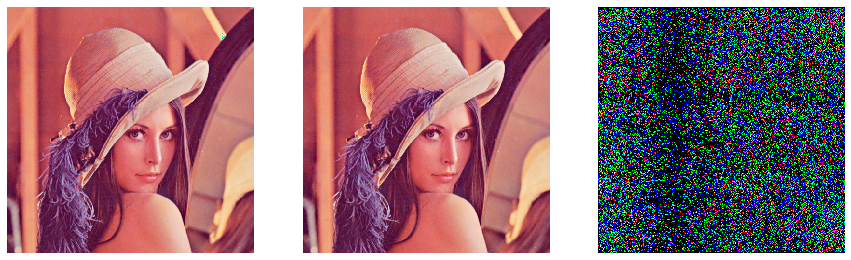

320


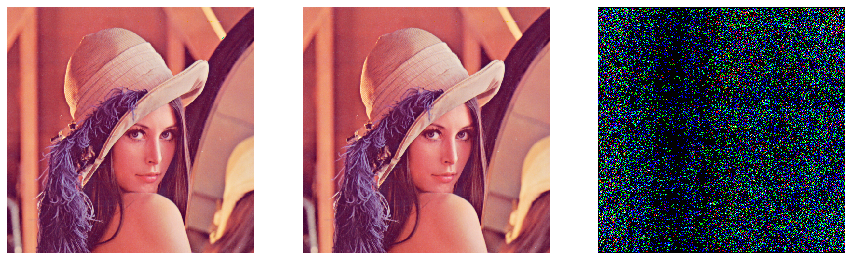

352


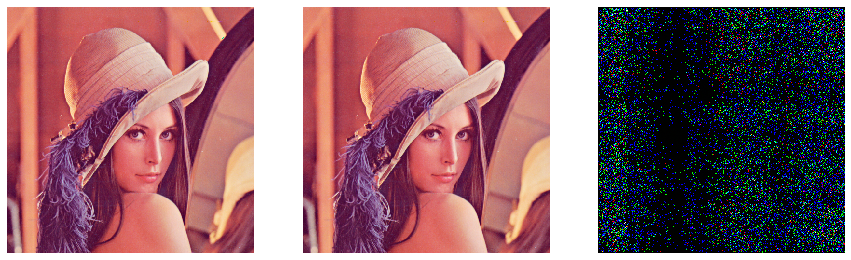

384


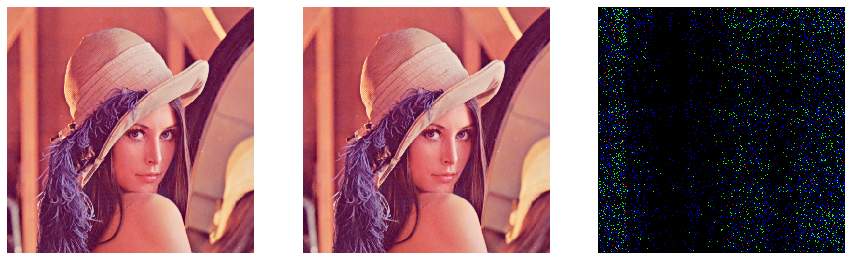

416


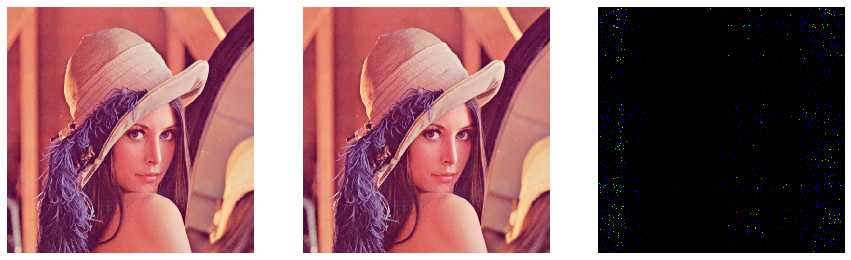

448


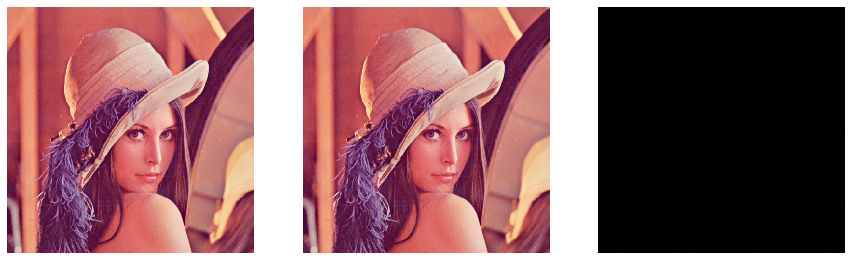

480


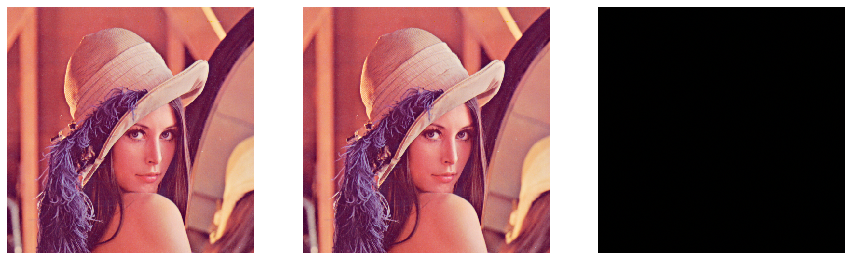

512


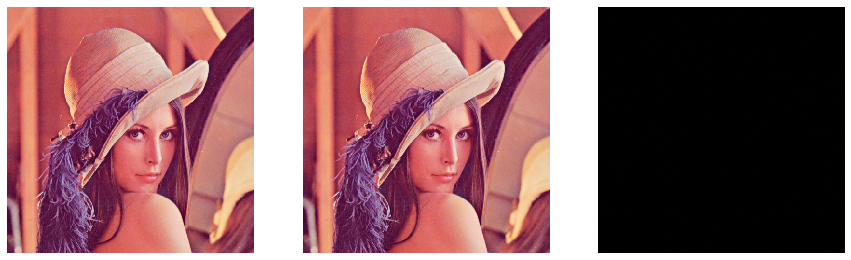

In [19]:
wyn=np.copy(Lenna)
for i in range(32, 513, 32):
    print(i)
    a=compress(*SVD0, i)
    b=compress(*SVD1, i)
    c=compress(*SVD2, i)
    wyn[:,:,0]=a
    wyn[:,:,1]=b
    wyn[:,:,2]=c
    pho=(wyn*255).astype(np.uint8)
    drawcmpimg(pho, Lenna)

Jak widać na obrazkach, im bardziej kompresujemy zdjęcie tym większa jest różnica między nim a oryginałem. Co zaskakujące zdjęcia wyglądają bardzo podobnie (dla k>160), a jednak jest spora różnica między nimi.